<a href="https://colab.research.google.com/github/Aseel-Alali/My-first-power-BI-project/blob/main/HTU_capstone_proj__Breast_Cancer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# breast cancer detiction


In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#load the data
from google.colab import files 
uploaded=files.upload()
df = pd.read_csv('/content/Breast_cancer_data.csv')

Saving Breast_cancer_data.csv to Breast_cancer_data.csv


In [ ]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [4]:
#count the number of coulmn and rows in the dataset
df.shape

(569, 6)

In [5]:
#count of the number of empty values in each coloum 
df.isna().sum()


mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
#get a count of the number of malognant () or benign ()  88888888888888888
df['diagnosis'].count()

569

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


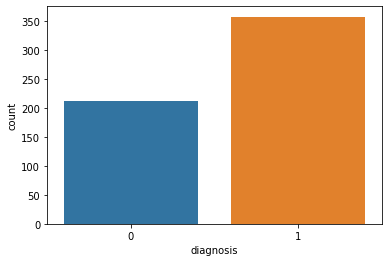

In [ ]:
#visualize the count 
sns.countplot(df['diagnosis'],label='count')

In [ ]:
#look at the datatyes to see which column need to be encoded 
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [6]:
#encode the categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
labelencoder_y.fit_transform(df.iloc[:,5].values)
df.iloc[:,5].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

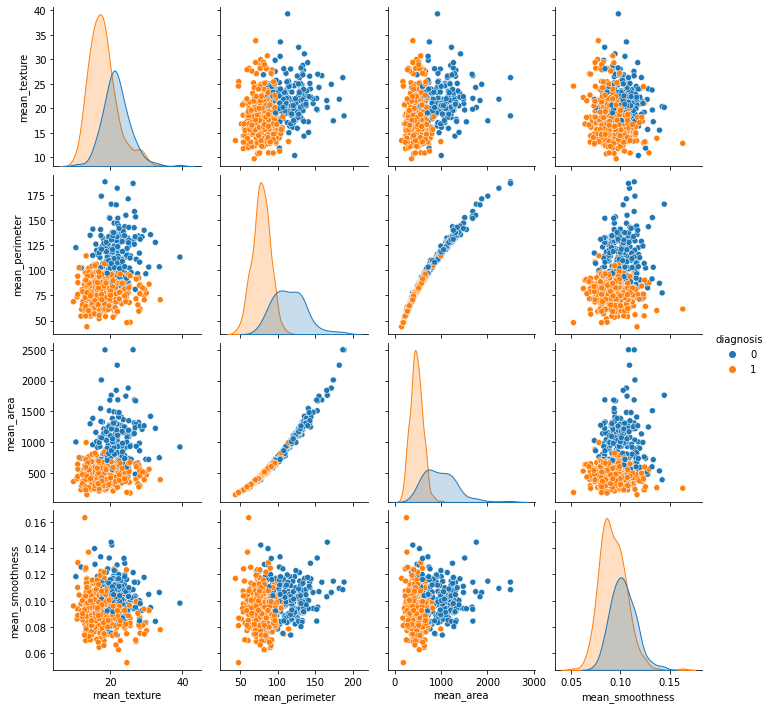

In [ ]:
#create  a pair plot 
sns.pairplot(df.iloc[:,1:9],hue='diagnosis')

In [7]:
#get the correlation of the column
df.iloc[:,1:9].corr()


,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_texture,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


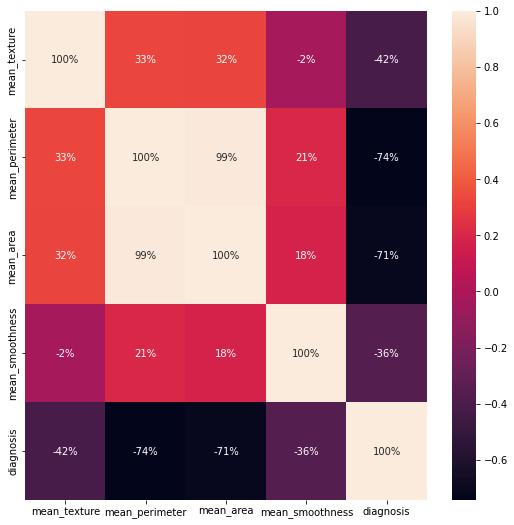

In [ ]:
#visulize the correlation
plt.figure(figsize=(9,9))

sns.heatmap(df.iloc[:,1:7].corr(),annot=True,fmt='.0%')

In [8]:
#split the data set into x and y 
x=df.iloc[:,0:4].values
y=df.iloc[:,5].values

In [9]:
#split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x ,y,test_size=0.25 ,random_state =0)

In [10]:
#scale the data (feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)



In [11]:
from pandas.core.frame import FormattersType
from sklearn import tree
from numpy.ma.core import log
#create a function for the models 
def models(x_train, y_train):

 #logistic regression
 from sklearn.linear_model import LogisticRegression
 log =LogisticRegression(random_state =0)
 log.fit(x_train,y_train)

 #decision tree 
 from sklearn.tree import DecisionTreeClassifier
 tree= DecisionTreeClassifier(criterion='entropy',random_state=0)
 tree.fit(x_train ,y_train )

 #random forset classifier 
 from sklearn.ensemble import RandomForestClassifier
 forest =RandomForestClassifier(n_estimators=10 ,criterion='entropy',random_state=0)
 forest.fit(x_train ,y_train )

 #print the data accuracy on the training data
 print('[0]Logistic regression training accuracy :',log.score(x_train,y_train))
 print('[1]desiion tree training accuracy :',tree.score(x_train,y_train))
 print('[2]random forest training accuracy :', forest.score(x_train,y_train)) 
 return log,tree,forest

In [ ]:
#getting all of the model 
model = models(x_train,y_train)

[0]Logistic regression training accuracy : 0.892018779342723
[1]desiion tree training accuracy : 1.0
[2]random forest training accuracy : 0.9859154929577465


In [ ]:
#test model accuracy on test data using confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
 print('model ',i )
 cm=confusion_matrix(y_test,model[i].predict(x_test))
 #true positive
 tp=cm[0][0] 
 #true negative
 tn=cm[1][1] 
 #false negative
 fn=cm[1][0]
 #false positive
 fp=cm[0][1]
 print (cm)
 print('testing accuracy=',(tp + tn)/ (tp + tn + fn + fp))
 print()

model  0
[[48  5]
 [ 7 83]]
testing accuracy= 0.916083916083916

model  1
[[46  7]
 [14 76]]
testing accuracy= 0.8531468531468531

model  2
[[49  4]
 [11 79]]
testing accuracy= 0.8951048951048951

